In [ ]:
!gdown "1qR1xhnTcGQgyJ-N3NXQAFxpuQYZnOWAo"

Downloading...
From: https://drive.google.com/uc?id=1qR1xhnTcGQgyJ-N3NXQAFxpuQYZnOWAo
To: /content/DAVE.jpg
100% 13.9k/13.9k [00:00<00:00, 30.6MB/s]


In [ ]:
!gdown "1nHgXun5lvuFl95lKsDmPewLUXgLcVcJ2"

Downloading...
From: https://drive.google.com/uc?id=1nHgXun5lvuFl95lKsDmPewLUXgLcVcJ2
To: /content/TOM AND JERRY.jpeg
100% 23.2k/23.2k [00:00<00:00, 55.3MB/s]


What is an Edge?
- An edge is a continuous set of pixels located at the boundary between two regions.
- It often represents a sudden change in position, intensity, or structure in an image.

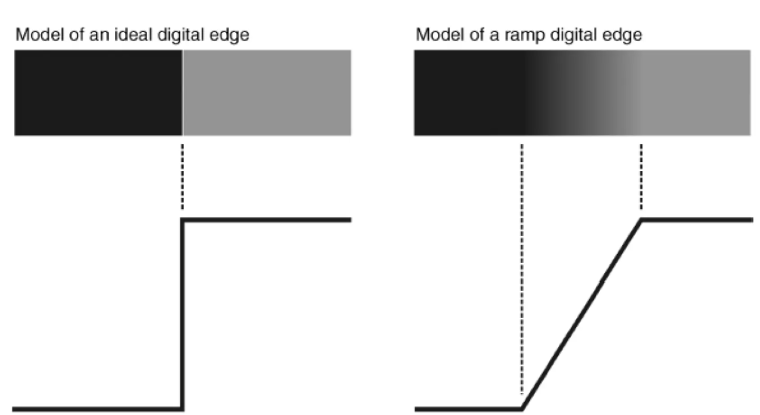

- (Left）The intensity profile shows a sudden jump in intensity values
- (Right) The intensity profile shows a gradual slope

How to Detect Edge Changes?


The intensity changes at edges can be detected using differential operators.
1. First-Order Derivatives:
Detect edge strength and direction using the gradient.
  - The first derivative acts like a "speedometer," measuring how quickly the pixel intensity changes. If there is a place where the pixel intensity changes rapidly, it is considered an edge
2. Second-Order Derivatives:
Detect edges by finding the zero-crossings of the Laplacian operator.
  - The second derivative doesn't measure how fast the intensity changes but instead focuses on how the rate of change (the gradient) itself varies.

# Sobel Operator

It works by calculating the gradient (first-order derivative) of pixel intensity in the horizontal and vertical directions。
- The horizontal gradient is calculated using：
$$
G_x =
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1
\end{bmatrix}
* I
$$

- The vertical gradient is calculated using：
$$
G_y =
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1
\end{bmatrix}
* I
$$


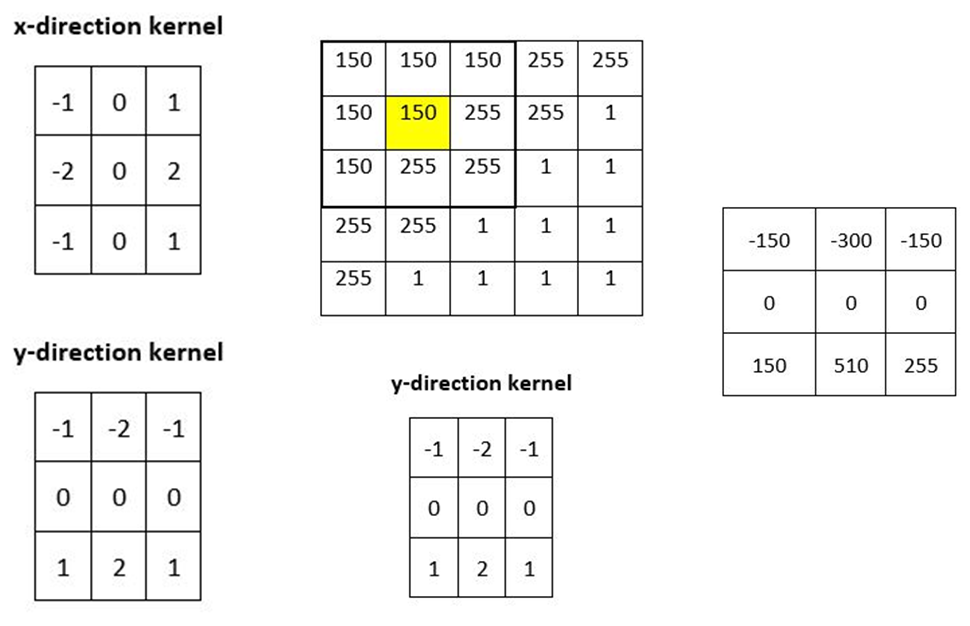

$$
G_x = (-1 \times 150) + (0 \times 150) + (+1 \times 150) +
      (-2 \times 150) + (0 \times 150) + (+2 \times 255) +
      (-1 \times 150) + (0 \times 255) + (+1 \times 255)
     = 0 + 210 + 105 = 315
$$




$$
G_y = -600 + 0 + 915 = 315
$$

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

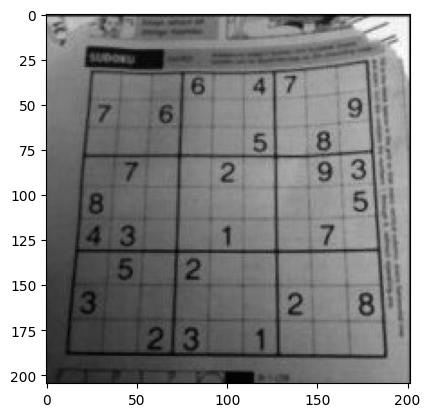

In [ ]:
DAVE = cv.imread('/content/DAVE.jpg')
assert DAVE is not None, "file could not be read, check with os.path.exists()"
plt.imshow(DAVE[:,:,::-1])
plt.show()

***1. Range Issue in Sobel Operation Results***

- The Sobel operator computes the gradient of pixel intensity, which involves subtracting pixel values.

- As a result:
Negative values and values greater than 255 may appear(e.g., 50−100=−50 and e.g.,
−1×100+2×150).


***2. Handle Out-of-Range Sobel Results***

- Use 16-bit signed integers: cv2.CV_16S.
  - Range: −32,768 to 32,767


***3. Convert Sobel Results Back to uint8***

- Use the cv2.convertScaleAbs() function



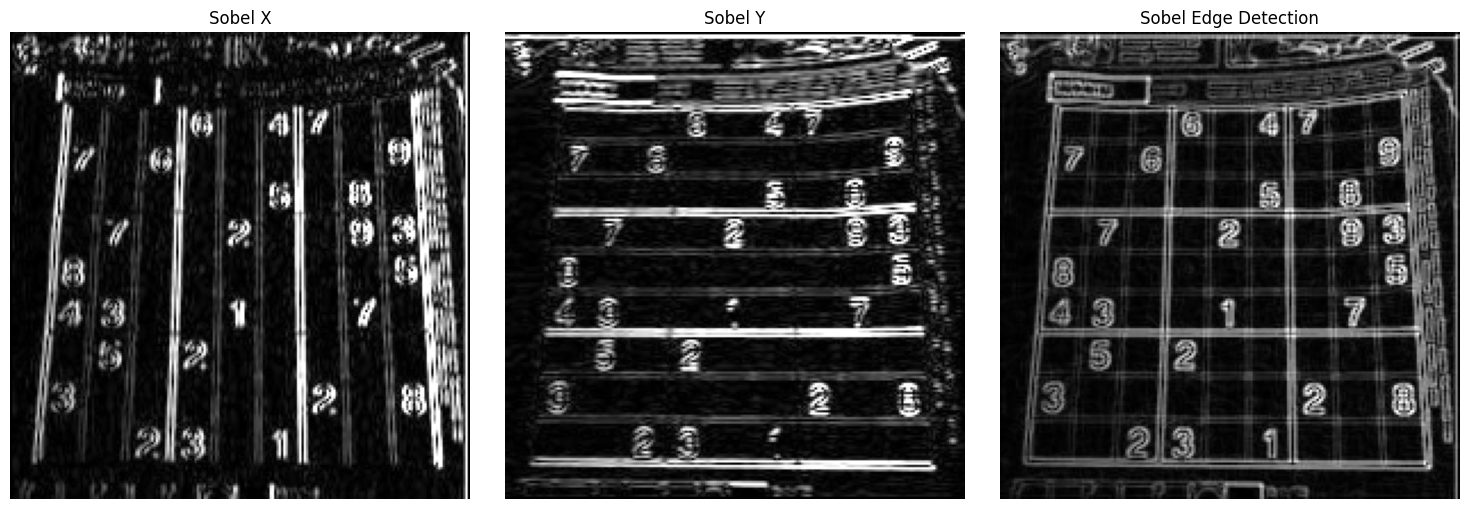

In [ ]:
# Step 1: Read the image
img = cv.imread('/content/DAVE.jpg', 0)

# Step 2: Compute Sobel gradient results
x = cv.Sobel(img, cv.CV_16S, 1, 0)  # Horizontal gradient (dx=1, dy=0)
y = cv.Sobel(img, cv.CV_16S, 0, 1)  # Vertical gradient (dx=0, dy=1)


# Step 3: Convert data to uint8 format
Scale_absX = cv.convertScaleAbs(x)
Scale_absY = cv.convertScaleAbs(y)

# Step 4: Combine results
result = cv.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)
# result=(255×0.5)+(255×0.5) =127.5+127.5=255

# Display the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Sobel X")
plt.imshow(Scale_absX, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Y")
plt.imshow(Scale_absY, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sobel Edge Detection")
plt.imshow(result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Canny edge detector

It is an advanced first-order edge detection method. Although it incorporates multiple steps to improve the quality of edge detection, its core is still based on first-order derivatives to detect edges.

1. Noise Reduction: Apply a Gaussian filter to smooth the image and reduce noise.
2. Gradient Calculation: Calculate the gradient magnitude and direction at each pixel in the image.
3. Non-Maximum Suppression: Suppress non-maximum gradients to remove unwanted edges and retain only the edge contours.
4. Double Threshold and Hysteresis: Apply double thresholding to classify strong and weak edges, and use hysteresis to connect weak edges to strong edges, completing the edge detection process.

### Step 2: Gradient magnitude and direction calculation

$$
\text{Edge_Gradient} \, (G) = \sqrt{G_x^2 + G_y^2}
$$



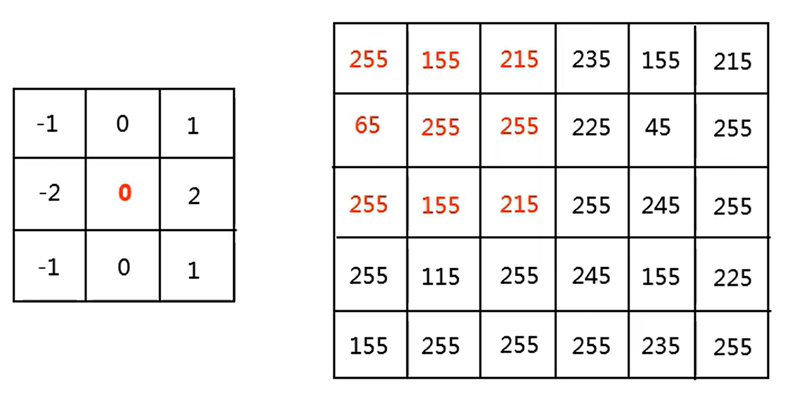


$$
\text{Angle} \, (\theta) = \tan^{-1} \left( \frac{G_y}{G_x} \right)
$$

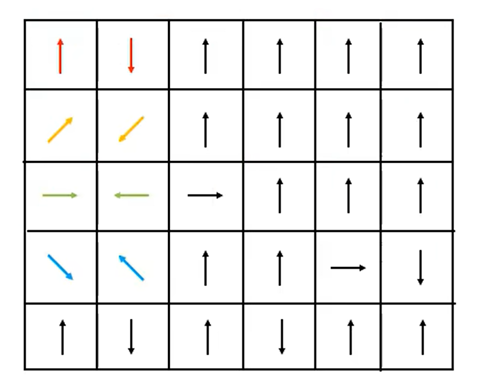

1. Vertical direction (up and down).
2. Horizontal direction (left and right).
3. Top-right to bottom-left diagonal.（blue)
4. Top-left to bottom-right diagonal. (yellow)

### Step 3: Non-Maximum Suppression (NMS)

Its purpose is to:
- Refine edges: Remove unnecessary edge pixels to make the edges thinner and more precise (each edge should ideally be one-pixel wide).
- Suppress redundancy: Keep only the strongest edge pixels in the direction of the gradient.

For example, if the edge is between a black and white region, the gradient might look like this:


**0 → 20 → 50 → 100 → 200**


Instead of one clear edge, you get a wide edge region with multiple strong gradient values.

1. NMS is used to make the edges thinner and more precise.
2. The goal is to find the strongest edge pixel along the edge direction and keep only that pixel.
3. By doing this, NMS gets rid of the extra "blur" or "wide edge" effect and leaves us with a single-pixel edge.


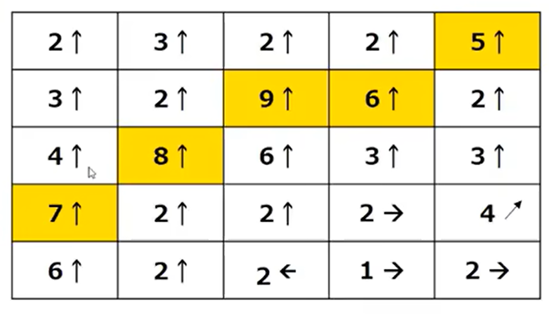

- If the arrow points upwards, the pixel is compared with its neighbors above and below.
- If the arrow points diagonally, the pixel is compared with its diagonal neighbors.

### Step 4: Double Threshold and Hysteresis

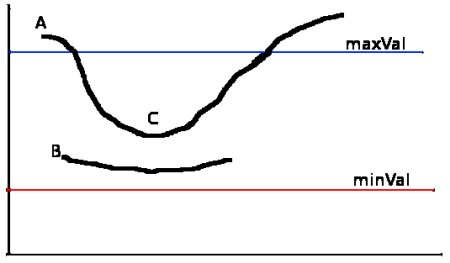

1. Set Two Thresholds:
- Thigh (High Threshold): Used to classify strong edges.
- Tlow (Low Threshold): Used to identify weak edges.

- Pixels with intensity higher than the high threshold are considered strong edges and retained.
- Intensity between the low and high thresholds are considered weak edges. These might be part of the edge but require further validation.
- Intensity below the low threshold are classified as non-edges and discarded.

2. Hysteresis Linking:

Weak edges are preserved only if they are connected to strong edges.This step ensures that isolated weak edges caused by noise are removed while retaining meaningful edge segments.

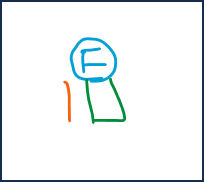

There is a person with a face, and outside the face, there is an orange line. During detection, if the line is connected to the face, it is considered part of the body (like the green line), so it should be preserved. If it is not connected, like the orange line, it will be discarded, as it does not belong to the main outline of the subject.

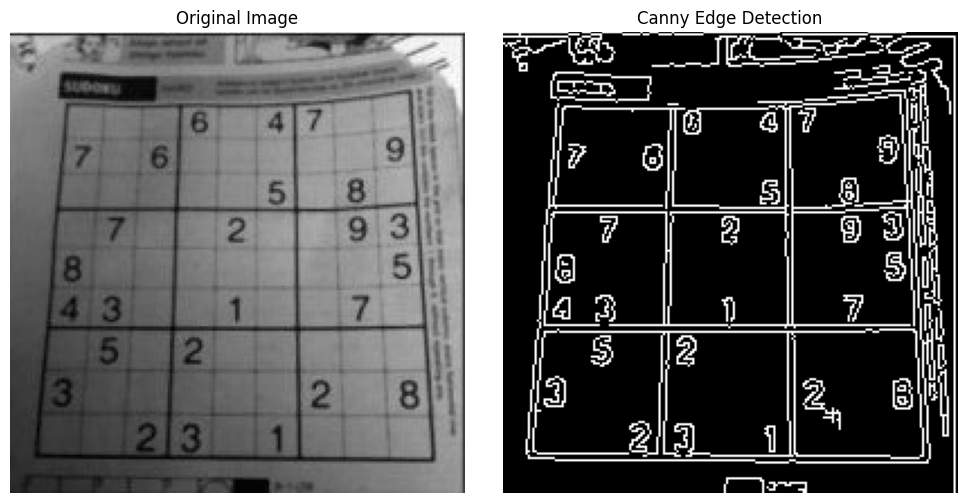

In [ ]:
# Step 1: Read the image
# Step 2: Perform Canny edge detection
lowThreshold = 50 # Set the lower threshold for edge detection
highThreshold = 150  # Set the upper threshold for edge detection

# Apply Canny edge detection
filtered_img = cv.GaussianBlur(img, (5, 5), 0.8)
canny_result = cv.Canny(filtered_img, lowThreshold, highThreshold)
#  Default is 3x3 and Sobel is used for gradient computation

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Canny Edge Detection")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


### Sobel vs Canny Edge Detection

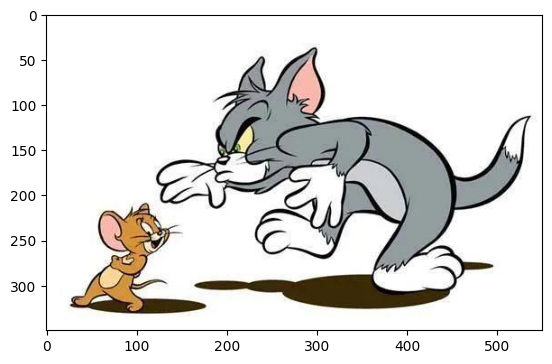

In [ ]:
TOM = cv.imread('/content/TOM AND JERRY.jpeg')
assert TOM is not None, "file could not be read, check with os.path.exists()"
plt.imshow(TOM[:,:,::-1])
plt.show()

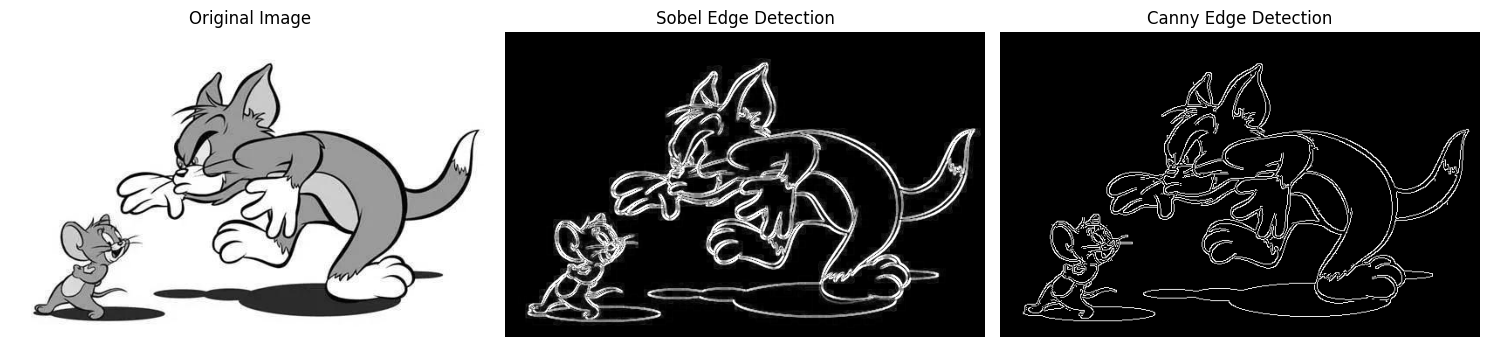

In [ ]:
# Read the image
TOM = cv.imread('/content/TOM AND JERRY.jpeg', 0) # Read the image in grayscale

# Compute Sobel gradient results
sobel_x = cv.Sobel(TOM, cv.CV_16S, 1, 0)  # Horizontal gradient (dx=1, dy=0)
sobel_y = cv.Sobel(TOM, cv.CV_16S, 0, 1) # Vertical gradient (dx=0, dy=1)

# Convert the gradient results to uint8 format
Scale_absX = cv.convertScaleAbs(sobel_x)   # Convert Sobel X to uint8
Scale_absY = cv.convertScaleAbs(sobel_y)

# Combine Sobel results
sobel_result = cv.addWeighted(Scale_absX, 0.5, Scale_absY, 0.5, 0)

# Compute Canny edge detection result
lowThreshold = 70
highThreshold = 170
canny_result = cv.Canny(TOM, lowThreshold, highThreshold)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(TOM, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_result, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Canny Edge Detection")
plt.imshow(canny_result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Laplacian

- The Laplacian is a second-order derivative-based edge detection method that calculates the rate of change in image intensity.
- It directly measures the brightness variations in the image without distinguishing directions (unlike Sobel, which separates horizontal and vertical directions).
- The Laplacian uses a single kernel to perform edge detection, unlike Sobel, which requires separate X and Y direction kernels.
- Standard Laplacian Kernel：
$$
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$


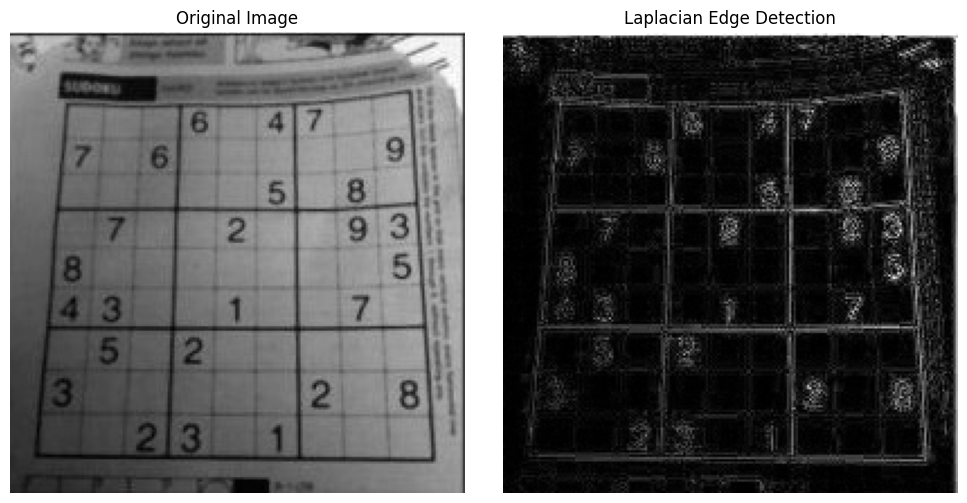

In [ ]:
# Step 1: Read the image
img = cv.imread('/content/DAVE.jpg', 0)

# Step 2: Perform Laplacian edge detection
laplacian = cv.Laplacian(img, cv.CV_64F) # Compute the Laplacian of the image
result = cv.convertScaleAbs(laplacian) # Convert the result to uint8 format for display

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Laplacian Edge Detection")
plt.imshow(result, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Marr-Hildreth Edge Detection

- The Laplacian operator is rarely used on its own due to its sensitivity to noise. To address this, it is typically combined with a smoothing filter.
- The Marr-Hildreth method achieves this by using a Gaussian filter, which smooths the image before applying the Laplacian operator to detect edges， this also known as the Laplacian of Gaussian (LoG).

***Flow of Marr-Hildreth***
1. Apply Gaussian Filter:
  - Smooth the image to reduce noise using a Gaussian filter.

2. Compute Laplacian:
  - Apply the Laplacian operator to the smoothed image to calculate the second-order derivatives.

3. Determine Zero Crossings:
  - Identify the edges by finding the zero crossings in the Laplacian result, as these indicate regions of rapid intensity change (edges).

- ***Zero crossing*** refers to a point in an image where the pixel value transitions from positive to negative, or from negative to positive.
- This change typically indicates a rapid intensity variation in the image, that is the edges

***Determine whether a pixel is part of an edge***
- Check the 3×3 neighborhood around each pixel to see if there are both negative and positive values (indicating a zero crossing)
$$
\begin{bmatrix}
-10 & -10 & 0 \\
10 & 20 & 10 \\
0 & -10 & -20
\end{bmatrix}
$$





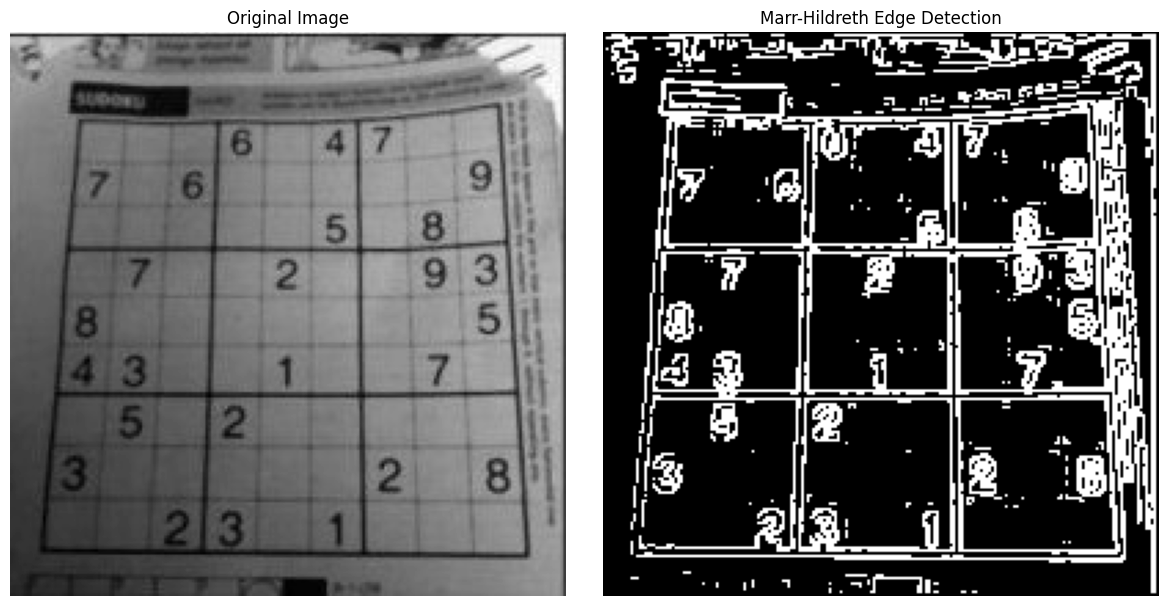

In [ ]:
# Step 1: Read the image
img = cv.imread('/content/DAVE.jpg', 0)  # Load image in grayscale

# Step 2: Apply Gaussian filter (smoothing)
blurred = cv.GaussianBlur(img, (5, 5), 1.2)

# Step 3: Compute Laplacian of the smoothed image
laplacian = cv.Laplacian(blurred, cv.CV_64F)  # Use CV_64F to capture negative values

# Step 4: Detect Zero-Crossings with Thresholding
threshold = 5  # Set a threshold for significant edges
# A threshold is used to ignore small variations (caused by noise or minor gradients) and focus only on significant changes in the Laplacian values

zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
# A new matrix is created with the same shape as the laplacian result, initialized with zeros. This matrix will store the edges

rows, cols = laplacian.shape

for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        # Extract 3×3 Neighborhood
        patch = laplacian[i-1:i+2, j-1:j+2]  # 3x3 patch around the pixel
        # Check for Zero Crossing
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Check zero-crossing with threshold
            zero_crossings[i, j] = 255  # If the above condition is true， mark as an edge

# Display the original image and Marr-Hildreth result
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")

# Marr-Hildreth Edge Detection
plt.subplot(1, 2, 2)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


### Laplacian vs Marr-Hildreth

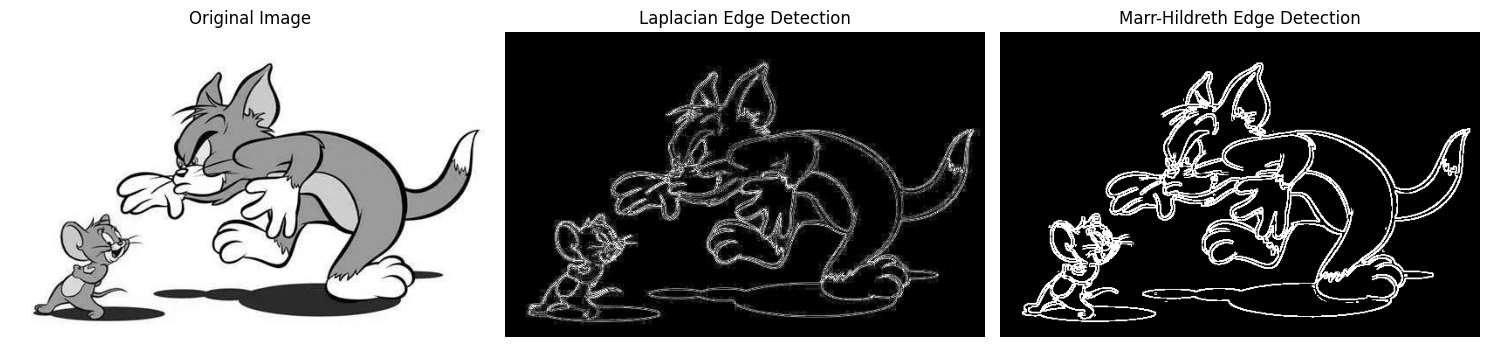

In [ ]:
# Read the image
TOM = cv.imread('/content/TOM AND JERRY.jpeg', 0)

# For Laplacian edge detection
laplacian = cv.Laplacian(TOM, cv.CV_64F)
laplacian_result = cv.convertScaleAbs(laplacian)

# For Marr-Hildreth edge detection
# Apply Gaussian filter to smooth the image
blurred = cv.GaussianBlur(TOM, (5, 5), 1.2) # GaussianBlur with kernel size 5x5 and sigma 1.2

# Compute the Laplacian of the blurred image
log = cv.Laplacian(blurred, cv.CV_64F)

# Detect zero-crossings
threshold = 5
zero_crossings = np.zeros_like(log, dtype=np.uint8)

rows, cols = log.shape
for i in range(1, rows - 1):
    for j in range(1, cols - 1):
        patch = log[i-1:i+2, j-1:j+2]
        if (patch.min() < -threshold) and (patch.max() > threshold):  # Zero crossing check
            zero_crossings[i, j] = 255

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(TOM, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Laplacian Edge Detection")
plt.imshow(laplacian_result, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Marr-Hildreth Edge Detection")
plt.imshow(zero_crossings, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


# Line detection
*   Consists of detecting alignments of points in an image of contours. (if that shape can be represented in mathematical form)
*   The usual method for line detection is the **"Hough transform"**.
Like the **Fourier transform**, it transposes the image from the spatial space to another space.

> where the information of interest is represented differently: the lines in the
spatial space are transformed into points in the Hough space.

##  First parameterization (a,b)
* **Hough’s idea:** each line of the image can be represented by a point in the Hough space
. The Hough space is then called the parameter space. (x,y)
equation : y = ax + b

* transform point - line or line - point

##  New parameterization (theta, d)
the lines are defined from two other parameters:

* **the distance (d) :**
 of the segment connecting the origin with the point closest to the line (this segment is perpendicular to the line),

* **the angle (theta) :**
 of this segment with the x-axis.

In [ ]:
#Sudoku image
!gdown "1bjJ38_JCOuYGmDcC9Addkl_ZTWkh8MX6"

Downloading...
From: https://drive.google.com/uc?id=1bjJ38_JCOuYGmDcC9Addkl_ZTWkh8MX6
To: /content/sudoku.png
100% 76.0k/76.0k [00:00<00:00, 24.3MB/s]


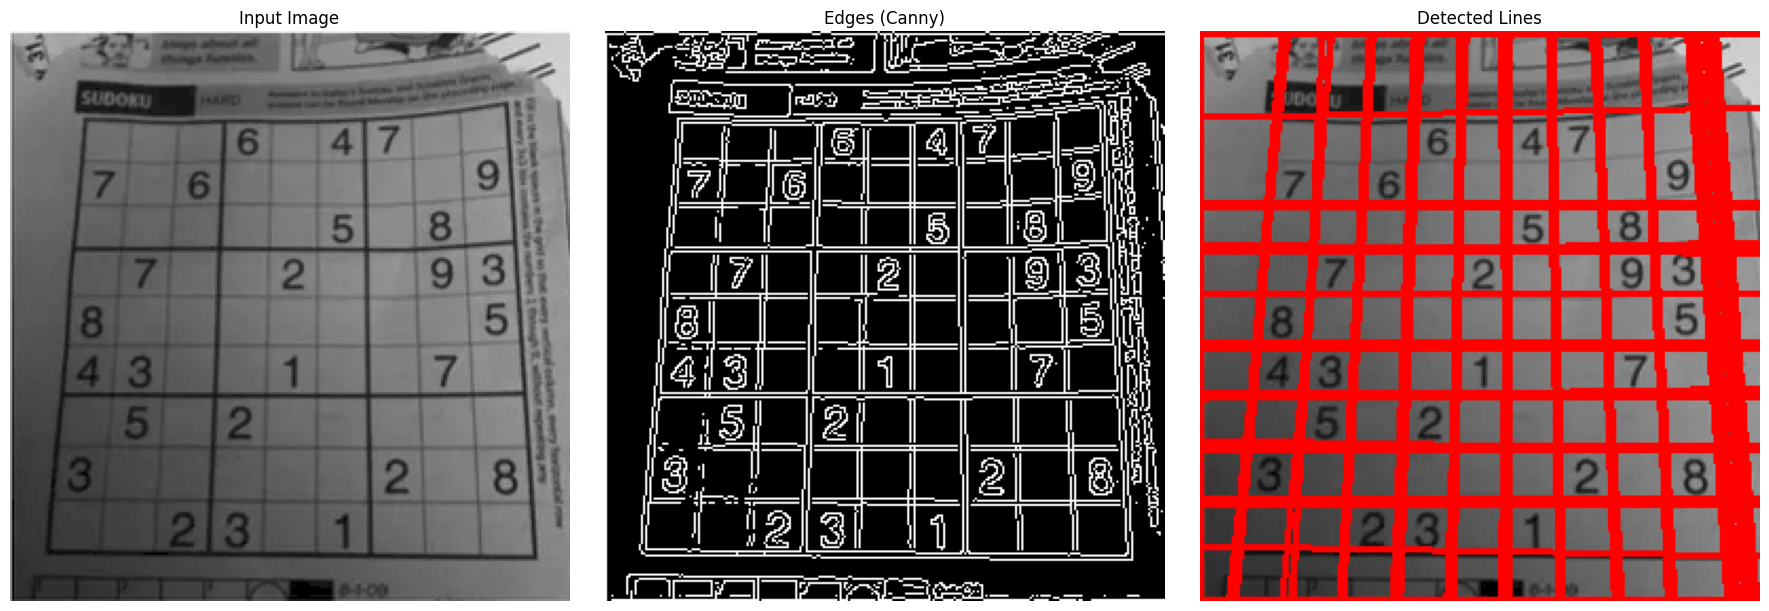

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

# Step 1: Preprocessing (Edge Detection)
edges = cv2.Canny(image, threshold1=50, threshold2=50, apertureSize=3)

# Step 2: Hough Transform for Line Detection
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

# Step 3: Draw the detected lines on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)


# Step 4: Visualization
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Edges (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Detected Lines")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


(0.0, 180.0, 378.0, -378.0)

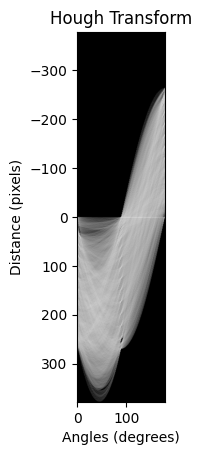

In [ ]:
# Manually compute Hough accumulator for visualization
rows, cols = edges.shape
diag_len = int(np.sqrt(rows**2 + cols**2))  # Maximum possible rho
rhos = np.linspace(-diag_len, diag_len, 2 * diag_len)
thetas = np.linspace(0, np.pi, 180)
hough_space = np.zeros((2 * diag_len, len(thetas)), dtype=np.uint64)

for y in range(rows):
    for x in range(cols):
        if edges[y, x]:  # If edge pixel
            for theta_idx, theta in enumerate(thetas):
                rho = int(x * np.cos(theta) + y * np.sin(theta)) + diag_len
                if 0 <= rho < 2 * diag_len:  # Ensure rho is within bounds
                    hough_space[rho, theta_idx] += 1

plt.title("Hough Transform")
plt.imshow(
    np.log(1 + hough_space),
    extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]],cmap='gray',aspect=1/1.5)
plt.xlabel("Angles (degrees)")
plt.ylabel("Distance (pixels)")
plt.axis("image")

# Corner detection (the Harris detector)

* **Harris Corner detection algorithm** was developed to identify the internal corners of an image.
* **The corners** of an image are basically identified as the regions in which there are variations in large intensity of the gradient in all possible dimensions and directions.
* **Harris Corner Detection** is a method to extract the corners from the input image and to extract features from the input image.

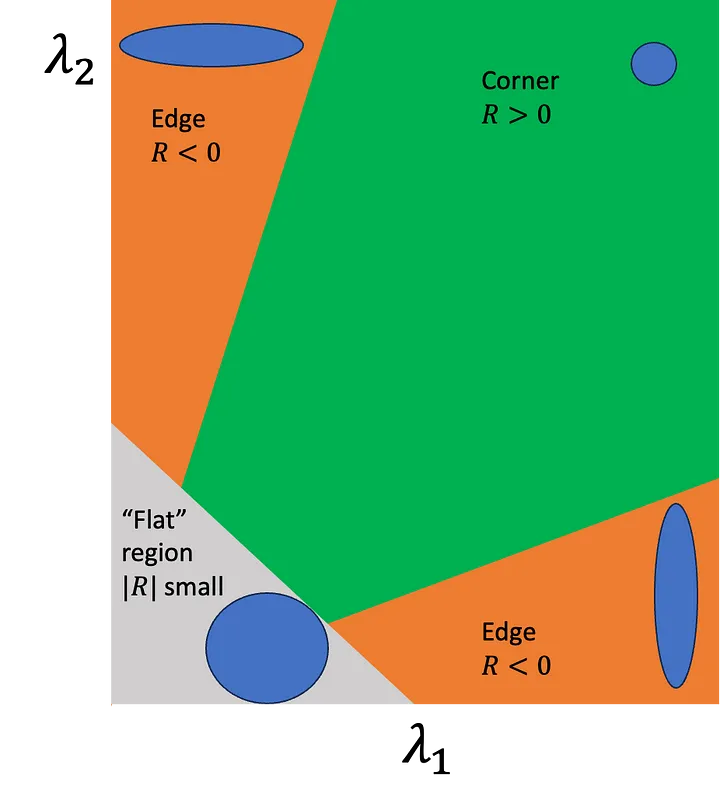

Reference : https://python.plainenglish.io/harris-corners-detector-from-theory-to-code-1d7b61289a38

In [ ]:
#Lines image
!gdown "1Mmr1MUgPlAtLr55NC-1widv60LLlbyOs"

Downloading...
From: https://drive.google.com/uc?id=1Mmr1MUgPlAtLr55NC-1widv60LLlbyOs
To: /content/lines.png
100% 13.2k/13.2k [00:00<00:00, 36.2MB/s]


In [ ]:
# Step 1: Import libraries
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

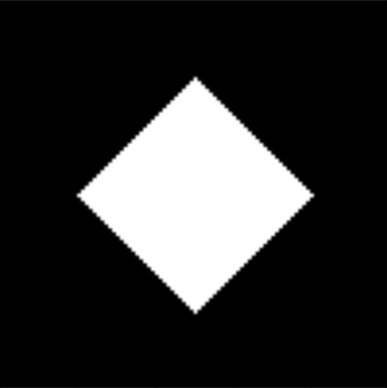

In [ ]:
# Step 2: Define variable to keep image data.
image_url = '/content/lines.png'
image = cv2.imread(image_url)
cv2_imshow(image)

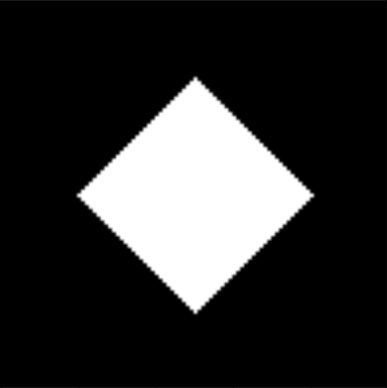

In [ ]:
# Step 3: Convert the input image into grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 4: Modify the data type setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
cv2_imshow(operatedImage)

**Parameters of cv2.cornerHarris()**
* **src** – Input Image (Single-channel, 8-bit or floating-point)
* **dest** – Image to store the Harris detector responses. Size is same as source image
* **blockSize** – Neighborhood size ( for each pixel value blockSize * blockSize neighbourhood is considered )
* **ksize** – Aperture parameter for the Sobel() operator
* **freeParameter** – Harris detector free parameter
* **borderType** – Pixel extrapolation method ( the extrapolation mode used returns the coordinate of the pixel corresponding to the specified extrapolated pixel )



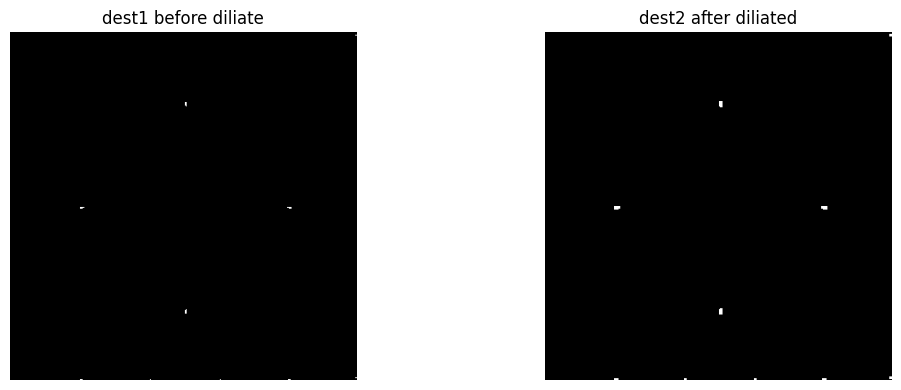

In [ ]:
# Step 5: Apply "the cv2.cornerHarris method"
# : to detect the corners with appropriate values as input parameters.
# Define vairable for keeping result from cornerHarris function
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) #(src,blockSize,ksize,freeParameter)

# Step 6: Results are marked through the dilated corners (make corner marked position to be bigger)
dest_dilate = cv2.dilate(dest, None)

# Step 7: Visualize the results of dest
plt.figure(figsize=(12, 4))

# Step 8: results of dest
plt.subplot(1, 2, 1)
plt.imshow(dest, cmap='gray', vmin=0, vmax=1)
plt.title('dest1 before diliate')
plt.axis('off')

# Step 9: results of dest diliated
plt.subplot(1, 2, 2)
plt.imshow(dest_dilate, cmap='gray', vmin=0, vmax=1)
plt.title('dest2 after diliated')
plt.axis('off')

plt.tight_layout()
plt.show()


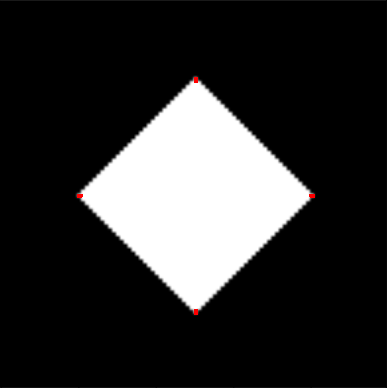

Image with Borders


In [ ]:
# Step 10: Reverting back to the original image,
# with optimal threshold value
image[dest_dilate > 0.01 * dest_dilate.max()]=[0, 0, 255]
cv2_imshow(image)
print('Image with Borders')


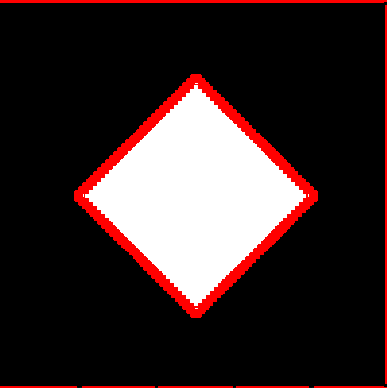

Image with Borders


In [ ]:
# Step 11: Reverting back to the original image,
# with optimal threshold value
image[dest_dilate < 0 * dest_dilate.max()]=[0, 0, 255]
cv2_imshow(image)
print('Image with Borders')